<a href="https://github.com/jagadeeshkn26/EVA2.0/blob/master/Project4/FirstDNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

#First Neural Network Model

#### This is the first neural network model without Batch Normalization, dropout , change of learning rate  included and Bottleneck layers.


#### This first neural network model has a series of 3*3 convolutions followed by a convolution with a bigger kernel.


### Total Number of parameters used :  50440
### Total Number of epoch trained : 20
### Batch size used while training = 32
### Validation accuracy acheived after 20 epochs :98.11%

#### Installing keras library using pip

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


#### Importing libraries needed for convolutions and mnist dataset

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#### Plotting the Image 

(60000, 28, 28)


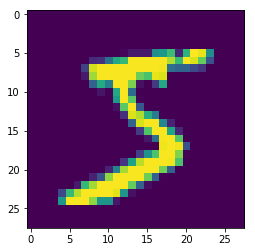

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

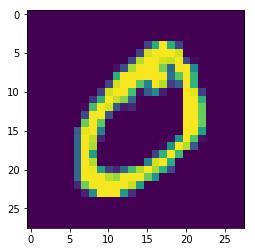

In [6]:
plt.imshow(X_train[1])

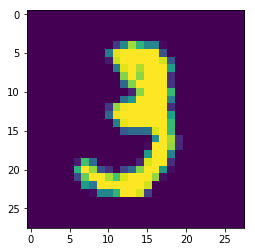

In [7]:
plt.imshow(X_train[10])

#### Reshaping the Image into required format

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

#### Converting train and test data into float and normalizing the data

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### seeing the first 10 training labels

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

####  Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

#### Checking the training labels after converting them to 10-dimensional class matrices.

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### Importing the required operators for convolutions

In [0]:
from keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Flatten,GlobalAveragePooling2D,Dropout

# First Neural Network Model

In [14]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) ##(3*3,26*26) of the form (effective global receptive field,output channel size )
model.add(Convolution2D(10, 3, 3, activation='relu'))  ##(5*5,24*24)
model.add(Convolution2D(10, 3, 3, activation='relu'))  ##(7*7,22*22)
model.add(Convolution2D(10, 1, activation='relu'))     ##(7*7,22*22)
model.add(Convolution2D(10, 22))  ##(29*29,10*1*1)
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys


#### Printing the summary of the model

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 10)        910       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 10)        110       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          48410     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total para

#### Importing the Adam optimizer.

In [0]:
from keras.optimizers import Adam

#### Compiling the model with specifying loss function for classification and optimizer

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.003),
             metrics=['accuracy'])

#### Training the model for 20 Epochs.

In [21]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.1395 - acc: 0.9572
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0644 - acc: 0.9799
Epoch 3/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0467 - acc: 0.9850
Epoch 4/20
60000/60000 [==============================] - 9s 156us/step - loss: 0.0362 - acc: 0.9885
Epoch 5/20
60000/60000 [==============================] - 9s 145us/step - loss: 0.0293 - acc: 0.9907
Epoch 6/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0240 - acc: 0.9917
Epoch 7/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0194 - acc: 0.9937
Epoch 8/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0189 - acc: 0.9938
Epoch 9/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0161 - acc: 0.9946
Epoch 10/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.0147 - 

#### Training the model for 5 more epochs

#### getting the score on the test data

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

#### Printing the score of test data evaluated by model

In [24]:
print(score)

[0.14256901991168042, 0.9811]


In [25]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


#### getting the predictions on test data

In [0]:
y_pred = model.predict(X_test)

#### Seeing the first nine predictions

In [28]:
print(y_pred[:9])
print(y_test[:9])

[[5.13799552e-27 4.60006110e-30 2.76940726e-14 1.15286371e-17
  0.00000000e+00 1.47216961e-31 0.00000000e+00 1.00000000e+00
  2.87358753e-22 2.54450666e-23]
 [4.98186424e-23 0.00000000e+00 1.00000000e+00 5.95372690e-34
  0.00000000e+00 0.00000000e+00 1.69786408e-19 0.00000000e+00
  1.14027737e-37 0.00000000e+00]
 [7.25669059e-19 1.00000000e+00 1.06225091e-08 4.17704261e-15
  1.16964341e-10 4.81525479e-11 8.78546808e-16 8.90029780e-15
  3.69563519e-10 1.03805439e-18]
 [1.00000000e+00 0.00000000e+00 2.21239009e-18 3.15954713e-30
  3.33306660e-28 1.16384727e-27 5.06852787e-23 5.71302703e-36
  1.10525321e-23 4.04384990e-16]
 [9.96829369e-27 0.00000000e+00 1.66615715e-32 2.90267484e-36
  1.00000000e+00 1.26001910e-26 1.27019644e-27 1.10123749e-32
  2.32896950e-20 2.10257442e-18]
 [2.32781965e-16 1.00000000e+00 1.78562387e-10 1.32735315e-17
  6.97017929e-11 1.09245975e-16 2.54671747e-18 1.69108640e-12
  5.59246116e-09 2.33038513e-18]
 [0.00000000e+00 3.70757624e-16 1.95703290e-13 1.43944654e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

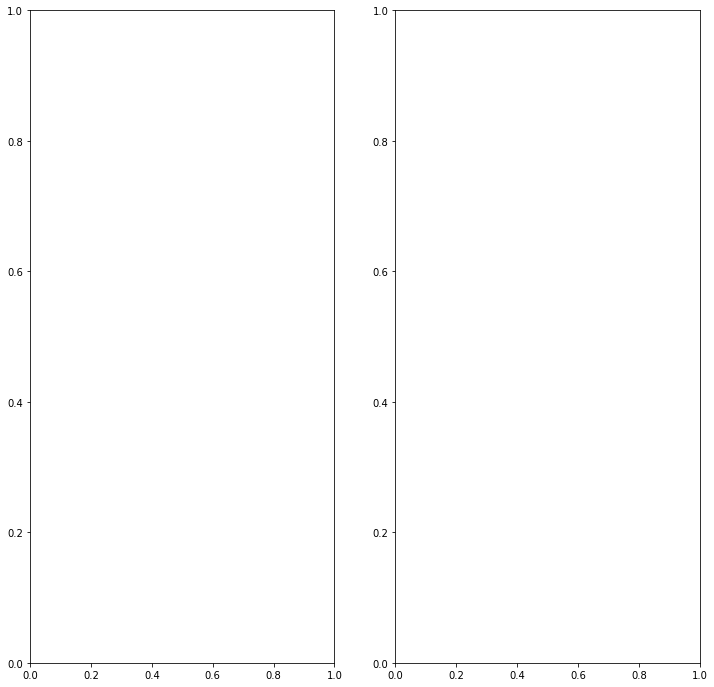

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()